<a href="https://colab.research.google.com/github/wahyunh10/Data-Analaysis-for-B2B-Retail-Customer/blob/main/Project_Bike_Sales_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sales Dataset**

**Introduction**

Let's Explore bike store sales in europe. All of the data can be downloaded directly via kaggle.

The data itself has the LIMITATION that all the transaction did not include the user id. So, the assumption is all the transaction is unique for each user.

**Data Preprocessing**

Import the csv file as panda DataFrames and examine it.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#Import the excel file and examine it
df = pd.read_csv('Sales.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [4]:
df.shape

(85244, 18)

**Cleaning the Dataset:** 

Dealing with missing values, correct and create necessary date data types, and drop the duplicate.

In [5]:
#Investigate missing value
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    1
Sub_Category        1
Product             1
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
dtype: int64

In [7]:
#drop missing value
df = df.dropna()
df.shape

(85243, 18)

In [6]:
df.dtypes

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age          int64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity      float64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object

In [8]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [9]:
#correct and create necessary date data types
df['Date'] = pd.to_datetime(df['Date'])
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Day_of_Weekend'] = df['Date'].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name().str[:3]

In [10]:
#Investigate the duplicate
df.duplicated().sum()

583

In [11]:
#drop the duplicate
df.drop_duplicates(inplace = True)
print(df.shape)

(84660, 21)


In [12]:
#final DataFrame
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,month_year,Day_of_Weekend,Month_Name
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,2013-11,Tuesday,Nov
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,2015-11,Thursday,Nov
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,2014-03,Sunday,Mar
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,2016-03,Wednesday,Mar
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,2014-05,Thursday,May


**Exploratory Analysis**

Exploratory data analysis is a way to better understand our data which helps in further Data preprocessing. And data visualization is a key, making the exploratory data analysis process streamline and easily analyzing data using plots and charts. First, describe numerical columns in descriptive stastic.

In [13]:
df[['Year','Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']].describe()

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,84660.000000,84660.000000,84660.000000,84660.000000,84660.000000,84660.000000,84660.00000,84660.000000
mean,2014.346551,36.026471,11.442228,306.339346,521.978030,325.702858,545.03918,870.742039
std,1.315598,10.837916,9.562534,584.866133,986.158153,486.200917,935.93410,1389.332109
min,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.00000,2.000000
25%,2013.000000,28.000000,2.000000,3.000000,9.000000,41.000000,42.00000,94.000000
50%,2014.000000,35.000000,10.000000,13.000000,35.000000,141.000000,168.00000,345.000000
75%,2016.000000,43.000000,20.000000,308.000000,540.000000,400.000000,616.00000,944.000000
max,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5638.000000,8684.00000,14312.000000


# **Sales Analysis**
**Sales Based On Country**

In [14]:
Country_Sales = df.groupby(['Country']).agg({'Revenue':'sum', 'Order_Quantity':'sum'}).sort_values('Revenue', ascending=False)
Country_Sales

,Revenue,Order_Quantity
Country,,
United States,24181195.0,345315.0
Australia,18927470.0,191460.0
United Kingdom,8787251.0,111663.0
Germany,7608273.0,87566.0
France,7231615.0,85026.0
Canada,6981217.0,147669.0


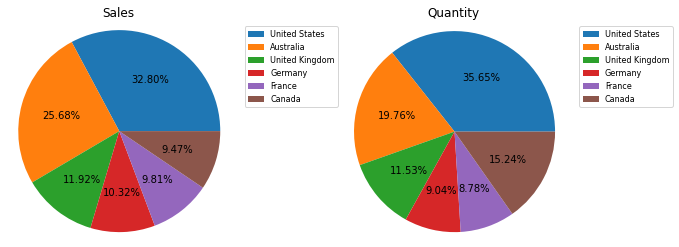

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 5 else ''

p,t,a = ax1.pie(Country_Sales.Revenue, autopct=autopct)
p,t,a = ax2.pie(Country_Sales.Order_Quantity, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Country_Sales.Revenue/Country_Sales.Revenue.sum()*100
normsizes2 = Country_Sales.Order_Quantity/Country_Sales.Order_Quantity.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Country_Sales.index.values,normsizes.values) if i > 5])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Country_Sales.index.values,normsizes2.values) if i > 5])

ax1.set_title('Sales')
ax2.set_title('Quantity')

ax1.legend(h, l,loc="best", bbox_to_anchor=(1.5,1), fontsize=8)
ax2.legend(h, j,loc="best", bbox_to_anchor=(1.5,1), fontsize=8)
plt.subplots_adjust(wspace = 0.5)

plt.show()


From the previous charts, we know. There are Top 3 Countries by Total Sales from 2011-2016, They are US, Australia and UK. But from the perspective of Total Quantities, the 3rd of Top 3 is Canada, while the top 2 remains held by the US and Australia and the UK dropped to the fourth. Now let's explore, where is the best foreign transaction for online retail.

**Sales Growth**

Next, let's explore the growth of sales for the 6 years.

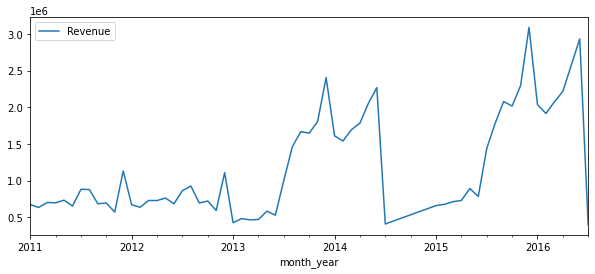

In [16]:
Sales_Gr = pd.DataFrame(df.groupby(['month_year']).agg({'Revenue':'sum'})).reset_index()
Sales_Gr.plot(x='month_year', figsize=(10,4));

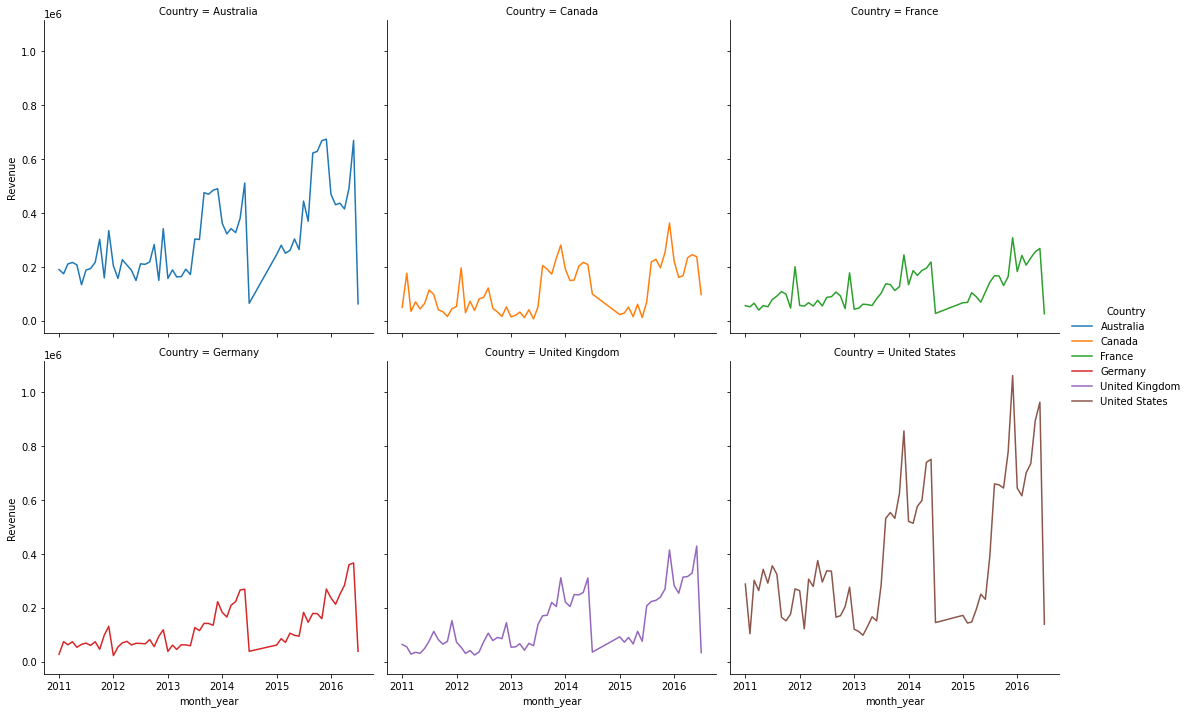

In [17]:
Sales_Gr_Country2 = df.groupby(['Country', 'month_year']).agg({'Revenue':'sum'}).reset_index().astype({'Revenue':'float'})
Sales_Gr_Country2['month_year'] = Sales_Gr_Country2['month_year'].astype(str)
Sales_Gr_Country2['month_year'] = pd.to_datetime(Sales_Gr_Country2['month_year'])
sns.relplot(x="month_year", y="Revenue", hue="Country", col='Country', col_wrap=3, kind='line', data=Sales_Gr_Country2);

Mid of 2013 to Mid of 2014 and Mid of 2015 to Mid 2016 are the highest growth of the sales. All of the countries recorded the peakest sales during these periods. But the largest transactions during these periods are from the US.

**Sales by Category**

In [18]:
Sales_Category = df.groupby(['Product_Category', 'Year']).agg({'Revenue':'sum', 'Order_Quantity':'sum', 'Profit':'sum'}).reset_index()
Sales_Category['Year']= Sales_Category['Year'].astype('category')
Sales_Category

,Product_Category,Year,Revenue,Order_Quantity,Profit
0,Accessories,2013,2737158.0,153035.0,1608924.0
1,Accessories,2014,3418430.0,200354.0,2007103.0
2,Accessories,2015,2661747.0,149086.0,1564654.0
3,Accessories,2016,3307725.0,194464.0,1942363.0
4,Bikes,2011,8951966.0,5254.0,2877185.0
5,Bikes,2012,9133795.0,5328.0,2938519.0
6,Bikes,2013,8476722.0,4830.0,2860428.0
7,Bikes,2014,5926453.0,3535.0,2057098.0
8,Bikes,2015,12809924.0,7294.0,4323990.0
9,Bikes,2016,8872642.0,5332.0,3073212.0


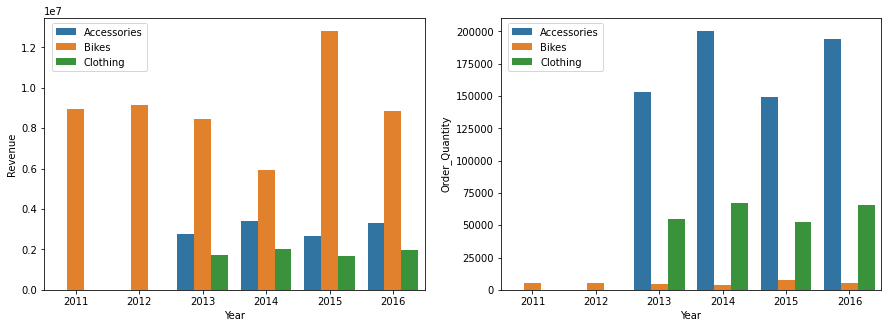

In [19]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x="Year", y="Revenue", hue="Product_Category", data=Sales_Category, ax=axes[0])
sns.barplot(x="Year", y="Order_Quantity", hue="Product_Category", data=Sales_Category, ax=axes[1])
axes[0].legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0)
axes[1].legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0)
plt.show()

It's wonderful to know how the dynamic growth of the sales from each category. From above graphs we know, 2015 is the highest peak of Bike Sales and 2016 is the highest sales of Accessories category, although the number of sales almost being equal to its 2014. We also already discover if Acessories and Clothes categories just went on sale at 2013.

From the total quantities, we know Acessories category is the largest.

Now let's warp it all to know the percentage of each categories from their total during all of periods Both in Sales, Profit and Quantities.

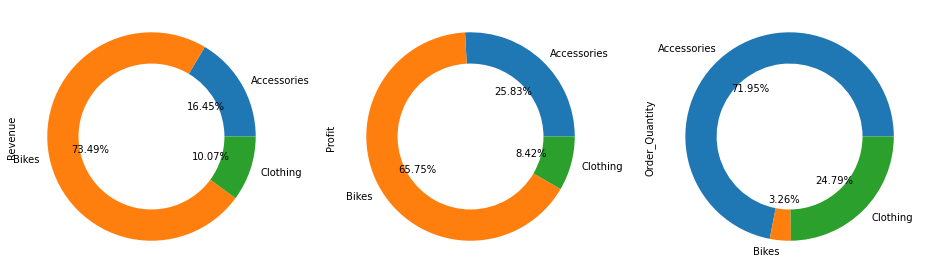

In [20]:
Sales_Category_Revenue = Sales_Category.groupby('Product_Category').agg({'Revenue':'sum','Profit':'sum', 'Order_Quantity':'sum'})
Sales_Category_Revenue.plot(kind='pie', wedgeprops=dict(width=.3), subplots=True, figsize=(13,13), autopct='%1.2f%%', legend=False, labels=Sales_Category_Revenue.index)
plt.tight_layout()
plt.show();

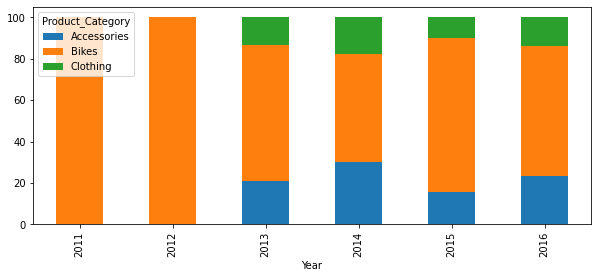

In [32]:
Sales_Category_Gr = Sales_Category.pivot(index='Year', values='Revenue', columns='Product_Category').fillna(0)
Sales_Category_Pct =  Sales_Category_Gr.apply(lambda x: x/sum(x)*100, axis=1).round(2)

ax= Sales_Category_Pct.plot(kind='bar', stacked=True, figsize=(10,4))

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
plt.show()

Although the propotion of Bikes in quantity is the smalest one, but its sales and profit is the highest one since it become the core of business. But when the sales of core business decline just like happened during 2014, Accessories and Clothing could be complementary items to support business. We know accessories and clothing are still growing when the sales of bikes decline in 2014.

**Sales by Sub - Category**

In [33]:
Sales_Sub_Category = df.groupby(['Product_Category', 'Sub_Category']).agg({'Revenue':'sum', 'Order_Quantity':'sum'}).reset_index().astype({'Sub_Category':'category'})
Sales_Sub_Category

,Product_Category,Sub_Category,Revenue,Order_Quantity
0,Accessories,Bike Racks,517800.0,4741.0
1,Accessories,Bike Stands,342830.0,2403.0
2,Accessories,Bottles and Cages,1390570.0,238610.0
3,Accessories,Cleaners,198821.0,27574.0
4,Accessories,Fenders,1245733.0,62138.0
5,Accessories,Helmets,5738482.0,181522.0
6,Accessories,Hydration Packs,990406.0,19914.0
7,Accessories,Tires and Tubes,1700418.0,160037.0
8,Bikes,Mountain Bikes,21020794.0,11935.0
9,Bikes,Road Bikes,33150708.0,19638.0


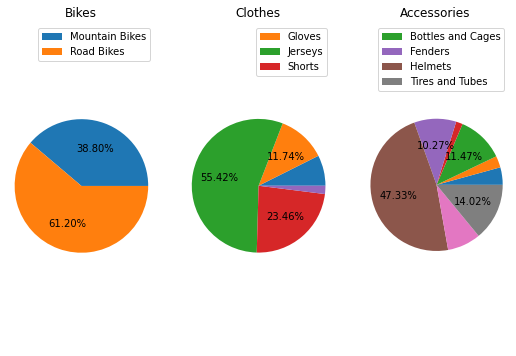

In [34]:
Category_Acc = Sales_Sub_Category[Sales_Sub_Category['Product_Category']=='Accessories']
Category_Bik = Sales_Sub_Category[Sales_Sub_Category['Product_Category']=='Bikes']
Category_Clt = Sales_Sub_Category[Sales_Sub_Category['Product_Category']=='Clothing']
f, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 10 else ''

p,t,a = ax2.pie(Category_Bik.Revenue, autopct=autopct)
p,t,a = ax3.pie(Category_Clt.Revenue, autopct=autopct)
p,t,a = ax4.pie(Category_Acc.Revenue, autopct=autopct)

ax2.axis('equal')
ax3.axis('equal')
ax4.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes2 = Category_Bik.Revenue/Category_Bik.Revenue.sum()*100
normsizes3 = Category_Clt.Revenue/Category_Clt.Revenue.sum()*100
normsizes4 = Category_Acc.Revenue/Category_Acc.Revenue.sum()*100

# create handles and labels for legend, take only those where value is > 1

h,j = zip(*[(h,lab) for h,lab,i in zip(p,Category_Bik.Sub_Category.values,normsizes2.values) if i > 10])
m,k = zip(*[(m,lab) for m,lab,i in zip(p,Category_Clt.Sub_Category.values,normsizes3.values) if i > 10])
n,l = zip(*[(n,lab) for n,lab,i in zip(p,Category_Acc.Sub_Category.values,normsizes4.values) if i > 10])
ax2.set_title('Bikes')
ax3.set_title('Clothes')
ax4.set_title('Accessories')
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(m, k,loc="best", bbox_to_anchor=(1,1))
ax4.legend(n, l,loc="best", bbox_to_anchor=(1,1))
plt.show()